## Importing Relevant Libraries

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier 

from sklearn.preprocessing import MinMaxScaler,LabelEncoder

from sklearn.decomposition import PCA


from sklearn.metrics import accuracy_score,recall_score, precision_score, confusion_matrix

## Data Preprocessing

In [68]:
df = pd.read_excel('E Commerce Dataset.xlsx',sheet_name = 'E Comm')
df.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,122.93


In [3]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [4]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [5]:
df.shape

(5630, 20)

In [6]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [69]:
#Droping some irrelevant columns
df= df.drop(columns=['CustomerID','NumberOfDeviceRegistered','NumberOfAddress'])
df.head(5)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,Laptop & Accessory,2,Single,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,Mobile,3,Single,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,Mobile,3,Single,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,Laptop & Accessory,5,Single,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,Mobile,5,Single,0,11.0,1.0,1.0,3.0,129.60


In [8]:
df.shape


(5630, 17)

In [70]:
# Checking for null values
df.isnull().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [71]:
# Divide the dataset into categorical and numeric columns
Num_col = df.select_dtypes(include = ['int64','float64']).columns
Cat_col = df.select_dtypes(include = ['object']).columns

print(Num_col.nunique())
print(Cat_col.nunique())

12
5


In [72]:
# Dealing with nan values
df[Num_col] = df[Num_col].fillna(df[Num_col].median())
df[Cat_col]=df[Cat_col].fillna(df[Cat_col].mode())

In [12]:
df.head(5)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,Laptop & Accessory,2,Single,1,11.0,1.0,1.0,5.0,159.93
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,Mobile,3,Single,1,15.0,0.0,1.0,0.0,120.90
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,Mobile,3,Single,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,Laptop & Accessory,5,Single,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,3.0,Mobile,5,Single,0,11.0,1.0,1.0,3.0,129.60


In [13]:
df.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [14]:
df["PreferredLoginDevice"].unique()

array(['Mobile Phone', 'Phone', 'Computer'], dtype=object)

In [15]:
df["PreferredLoginDevice"]=df["PreferredLoginDevice"].replace('Mobile Phone','Phone' )

In [16]:
df["PreferredPaymentMode"].unique()

array(['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD',
       'Credit Card'], dtype=object)

In [17]:
replacement = { 'COD': 'Cash on Delivery',
              'CC': 'Credit Card'}
df["PreferredPaymentMode"]=df["PreferredPaymentMode"].replace(replacement)

In [18]:
df["PreferredPaymentMode"].unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet'],
      dtype=object)

In [19]:
df.head(10)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Phone,3,6.0,Debit Card,Female,3.0,Laptop & Accessory,2,Single,1,11.0,1.0,1.0,5.0,159.93
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,Mobile,3,Single,1,15.0,0.0,1.0,0.0,120.90
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,Mobile,3,Single,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,Laptop & Accessory,5,Single,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,Credit Card,Male,3.0,Mobile,5,Single,0,11.0,1.0,1.0,3.0,129.60
5,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,Mobile Phone,5,Single,1,22.0,4.0,6.0,7.0,139.19
6,1,9.0,Phone,3,11.0,Cash on Delivery,Male,2.0,Laptop & Accessory,2,Divorced,0,14.0,0.0,1.0,0.0,120.86
7,1,9.0,Phone,1,6.0,Credit Card,Male,3.0,Mobile,2,Divorced,1,16.0,2.0,2.0,0.0,122.93
8,1,13.0,Phone,3,9.0,E wallet,Male,3.0,Mobile,3,Divorced,1,14.0,0.0,1.0,2.0,126.83
9,1,9.0,Phone,1,31.0,Debit Card,Male,2.0,Mobile,3,Single,0,12.0,1.0,1.0,1.0,122.93


### Statistical And Exploratory Data Analysis

Churn
0    4682
1     948
Name: count, dtype: int64


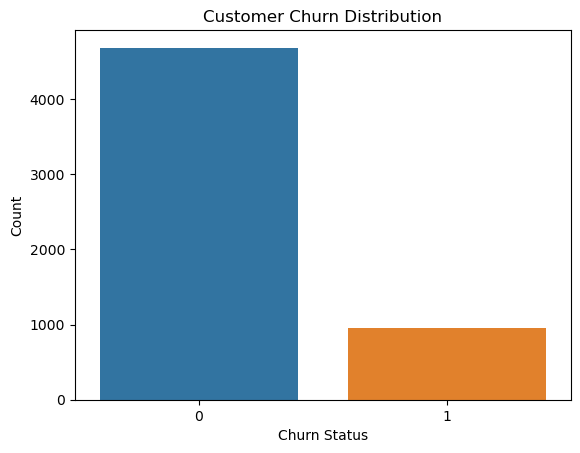

In [76]:
#checking the  count of 0's and 1's
print(df['Churn'].value_counts())

sns.countplot(x = 'Churn', data = df)
plt.title( 'Customer Churn Distribution')
plt.xlabel( 'Churn Status')
plt.ylabel('Count')
plt.savefig('Customer_churn_distribution.png')
plt.show()

In [21]:
#Checkinng for data imbalance
churn_percent = (df['Churn'].sum()/len(df['Churn']))*100
Retention_pct = 100 - churn_percent

In [22]:
print(churn_percent)
print(Retention_pct)

16.838365896980463
83.16163410301954


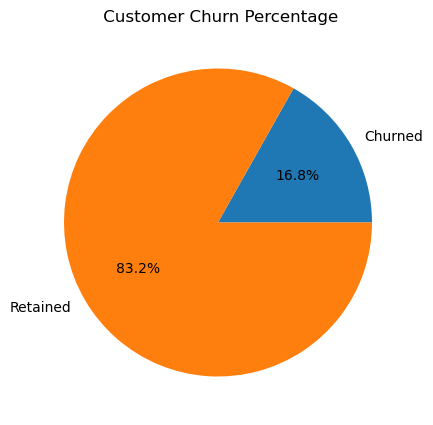

In [77]:
plt.figure(figsize=(6,5))
plt.pie([churn_percent, Retention_pct],
       labels = ['Churned', 'Retained'],
       autopct= '%1.1f%%')
plt.title(' Customer Churn Percentage')
plt.savefig('Customer_churn_percentage.png')
plt.show()

### Demographic Information

#### Gender

In [24]:
df['Gender'].value_counts()

Gender
Male      3384
Female    2246
Name: count, dtype: int64

In [25]:
# statistical analysis of the relationship between gender and Churn
from scipy.stats import chi2_contingency
cont_table = pd.crosstab(df['Gender'], df['Churn'])
chi2,p,dof, expected = chi2_contingency(cont_table)

print("Chi_Square Statistics:", chi2)
print('p_value:', p)


#Fromhe results below indicates that there is a statiscally significant association between Gender and Churn.
#his could indicate that one gender is likely to churn than the other

Chi_Square Statistics: 4.662908495367532
p_value: 0.030820940334890086


In [26]:
# Lets quantify and see the strength of the  association between Gender and churn using Odd Ratio
from scipy.stats.contingency import odds_ratio
odds_ratio_value = odds_ratio(cont_table)

print("Odds Ratio:", odds_ratio_value)

##The result below means the odds of churning is approximately 1.17 times higher for one gender compared to the order.


Odds Ratio: OddsRatioResult(statistic=1.175402618645718)


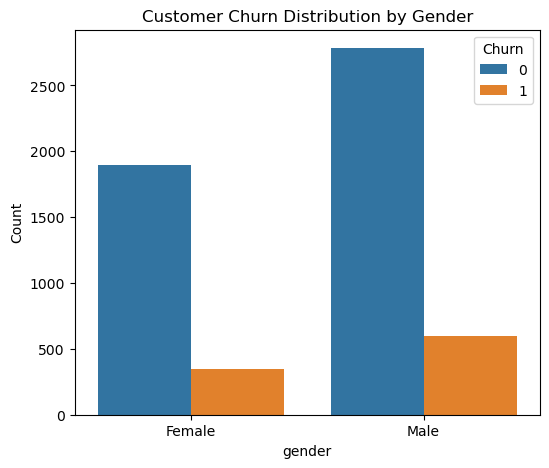

In [78]:
#Lets visualise it and see for ourselves
plt.figure(figsize=(6,5))
sns.countplot(x = 'Gender',hue = 'Churn', data = df)
plt.title( 'Customer Churn Distribution by Gender')
plt.xlabel( 'gender')
plt.ylabel('Count')
plt.savefig('Customer_churn_distribution_by_gender.png')
plt.show()


# The plot below verifies that the male are 1.17 times more likely to churn than the female

Recommedation: Develop targeted retention strategies for both male and female customers, especially the male customers as they have 1.17 more odds of churning 

### Behavioral Data

##### HourSpendOnApp

In [28]:
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [29]:
df.HourSpendOnApp.value_counts()

HourSpendOnApp
3.0    2942
2.0    1471
4.0    1176
1.0      35
0.0       3
5.0       3
Name: count, dtype: int64

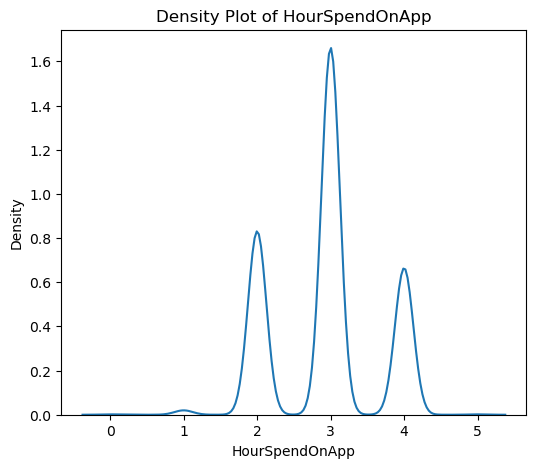

In [30]:
plt.figure(figsize=(6,5))
sns.kdeplot(df['HourSpendOnApp'])
plt.title( 'Density Plot of HourSpendOnApp')
plt.xlabel( 'HourSpendOnApp')
plt.ylabel('Density')
plt.show()

In [31]:
# Lets categorise the HourSpendOnApp column into Low, Medium and High

df['HoursSpendOnApp_cat']= pd.cut(df['HourSpendOnApp'], bins = [0,2,4, float('inf')], 
                               labels=['Low','medium','High'])


df['HoursSpendOnApp_cat'].value_counts()

HoursSpendOnApp_cat
medium    4118
Low       1506
High         3
Name: count, dtype: int64

In [32]:
#Chi2 test
cont_table2 = pd.crosstab(df['HoursSpendOnApp_cat'], df['Churn'])
chi2,p,dof, expected = chi2_contingency(cont_table2)

print("Chi_Square Statistics:", chi2)
print('p_value:', p)

#The Chi2 result says that there is no statistically significant association between HoursSpendOnApp and Churn

Chi_Square Statistics: 3.7004414604512186
p_value: 0.15720246314859268


In [33]:
# To authenticate the above Chi2 results lets  do a correlation test

corr_coef = df['HourSpendOnApp'].corr(df['Churn'])

print('Correlation Coefficient:', corr_coef)

# A very weak relationship

Correlation Coefficient: 0.018815777257478117


As can be seen above the correlation coefficient is 0.0188, which is a very weak or neglible relationship between HourSpendOnApp and Churn. This aligns with the Chi Square test ( p_value = 0.157) we did earlier. In conclusion, there is no relationship between HoursSpendOnApp and Churn.

#### OrderAmountHikeFromlastYear

In [34]:
# Lets Investigate Order amount increase (OrderAmountHikeFromLastYear) to see if it has effect on churn
df['OrderAmountHikeFromlastYear'].unique()

array([11., 15., 14., 23., 22., 16., 12., 13., 17., 18., 24., 19., 20.,
       21., 25., 26.])

In [35]:
# Lets say Hike less than 10% = Low, 10-20% = Medium and More then 20% = High 
df['OrderHike_cat']= pd.cut(df['OrderAmountHikeFromlastYear'], bins = [-float('inf'), 10,20, float('inf')],
                                                labels= ['Low', 'Medium', 'High'])
                                                                       
# Chi1 test                                                                      
cont_table3 = pd.crosstab(df['OrderHike_cat'], df['Churn'])
chi2,p,dof, expected = chi2_contingency(cont_table3)

print("Chi_Square Statistics:", chi2)
print('p_value:', p)


# Again no Statistically significant association between Order amount hike and churn 

Chi_Square Statistics: 2.354142344865491
p_value: 0.12495058863736581


In [36]:
# Verify with a correlation test

corr_coef = df['OrderAmountHikeFromlastYear'].corr(df['Churn'])

print('Correlation Coefficient:', corr_coef)

# A very weak relationship

Correlation Coefficient: -0.007074921903846125


There is no significant relationship between order amount hike from last year and churn. Also the correlation between this
two elements is a very weak one. According to the ive sign, this means even if a correlation exist, that Order amount hike will lead to a decrease in churn. Thus Order amount hike is a good thing. Things we love to see.

#### Order Count

In [37]:
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'HoursSpendOnApp_cat',
       'OrderHike_cat'],
      dtype='object')

In [38]:
df.OrderCount.unique()

array([ 1.,  6.,  2., 15.,  4.,  7.,  3.,  9., 11.,  5., 12., 10.,  8.,
       13., 14., 16.])

In [39]:
# Lets say Ordercount less than 1 = Low, 1-10 = Medium and More then 15+ = High 
df['OrderCount_cat']= pd.cut(df['OrderCount'], bins = [1, 10,15, float('inf')],
                                                labels= ['Low', 'Medium', 'High'])
                                                                       
# Chi1 test                                                                      
cont_table4 = pd.crosstab(df['OrderCount_cat'], df['Churn'])
chi2,p,dof, expected = chi2_contingency(cont_table4)

print("Chi_Square Statistics:", chi2)
print('p_value:', p)


Chi_Square Statistics: 6.31860732329389
p_value: 0.042455294039417744


In [40]:
# Lets confirm with correlation analysis
corr_coef = df['OrderCount'].corr(df['Churn'])

print('Correlation Coefficient:', corr_coef)


Correlation Coefficient: -0.024037527011581992


p_value of 0.04 suggest a statistically significant relationship between Order count and Churn. Correlation of -0.024 indicates a very weak negative linear relationship between Order count and churn. This suggest that as Order count increases, churn might decrease, but the effect is extremely small.

Recommendation: I recommend exploring alternative strategies ton reduce churn as OrderCount alone may not be a strong predictor.

### Preference and Satisfaction

#### Satisfaction Score

In [41]:
df.SatisfactionScore.unique()

array([2, 3, 5, 4, 1], dtype=int64)

In [42]:
df.SatisfactionScore.value_counts()

SatisfactionScore
3    1698
1    1164
5    1108
4    1074
2     586
Name: count, dtype: int64

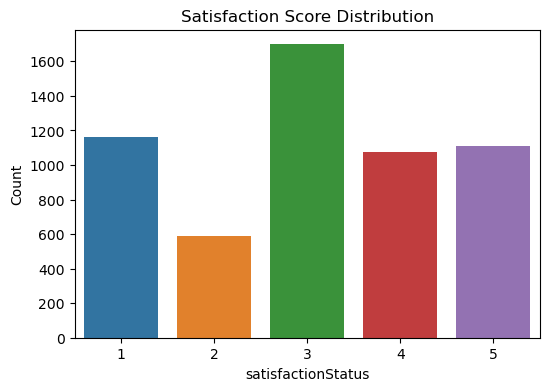

In [79]:
plt.figure(figsize=(6,4))
sns.countplot(x = 'SatisfactionScore', data = df)
plt.title( 'Satisfaction Score Distribution')
plt.xlabel( 'satisfactionStatus')
plt.ylabel('Count')
plt.savefig('Satisfaction_score_distribution.png')
plt.show()

In [44]:
# Lets say SatisfactionScore less than 1-2 = Low, 3 = Medium and More then 5 = High 
df['SatisfactionScore_cat']= pd.cut(df['SatisfactionScore'], bins = [0,2,4, float('inf')],
                                                labels= ['Low', 'Medium', 'High'])

                                  
# Chi1 test                                                                      
cont_table5 = pd.crosstab(df['SatisfactionScore_cat'], df['Churn'])
chi2,p,dof, expected = chi2_contingency(cont_table5)

print("Chi_Square Statistics:", chi2)
print('p_value:', p)

Chi_Square Statistics: 69.51678890125453
p_value: 8.028253739734486e-16


In [45]:
# Lets verify with Correlation test

corr_coef = df['SatisfactionScore'].corr(df['Churn'])

print('Correlation Coefficient:', corr_coef)

Correlation Coefficient: 0.10548114706635904


From the above, it is evident that Satisfaction Score has a very strong relationship statistically with churn. However the correlation coefficient of 0.105 suggest a weak linear relationship between Satisfaction score and churn. Given the chi squared score, it is likely that the relationship is more complex and not solely linear.

Recommendation: Focus on increasing customers satisfaction score through targeted initiatives.

#### Payment Mode

In [46]:
df.PreferredPaymentMode.value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: count, dtype: int64

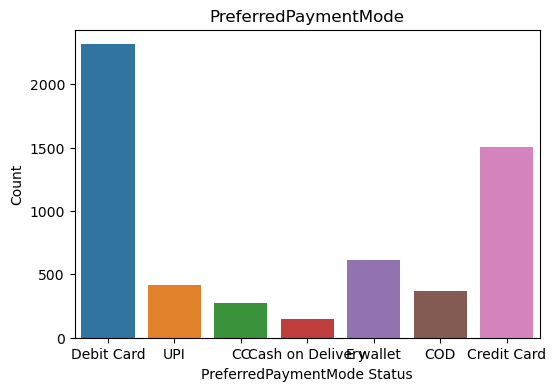

In [80]:
plt.figure(figsize=(6,4))
sns.countplot(x = df['PreferredPaymentMode'], data= df)
plt.title( 'PreferredPaymentMode')
plt.xlabel( 'PreferredPaymentMode Status')
plt.ylabel('Count')
plt.savefig('Preferred_payment_mode.png')
plt.show()

In [48]:
# Chi2 test                                                                      
cont_table6 = pd.crosstab(df['PreferredPaymentMode'], df['Churn'])
chi2,p,dof, expected = chi2_contingency(cont_table6)

print("Chi_Square Statistics:", chi2)
print('p_value:', p)

Chi_Square Statistics: 51.82895974579939
p_value: 1.4978570960706217e-10


In [49]:
encoder = LabelEncoder()
df['PaymentMode'] = pd.DataFrame(encoder.fit_transform(df['PreferredPaymentMode']))


corr_coef = df['PaymentMode'].corr(df['Churn'])

print('Correlation Coefficient:', corr_coef)

Correlation Coefficient: 0.002344850715781255


Although the correlation between preferred payment method and churn is weak, the chi squared test indicates a statiscally significant association.

Recommendation: Focus on optimizing payment optuons to reduce churn

### Logistics and Location

#### WarehouseToHome (Distance)

In [50]:
df['WarehouseToHome'].unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  10.,  27.,  17.,  23.,  33.,  19.,
        35.,  24.,  16.,  25.,  32.,  34.,   5.,  21., 126.,   7.,  36.,
       127.])

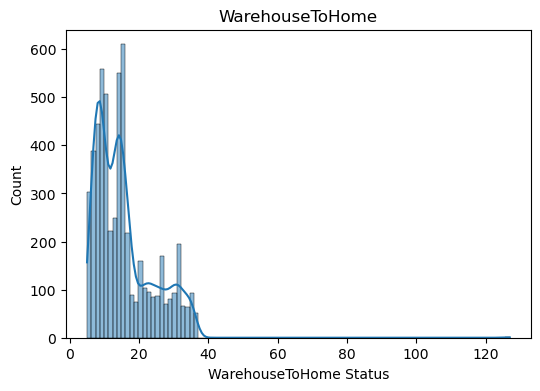

In [51]:
plt.figure(figsize=(6,4))
sns.histplot(x = df['WarehouseToHome'], kde = True)
plt.title( 'WarehouseToHome')
plt.xlabel( 'WarehouseToHome Status')
plt.ylabel('Count')
plt.show()

In [52]:
# Lets say SatisfactionScore less than 0-10 = Near, 10-40= Far and More then 40+= Very Far  
df['WarehouseToHome_cat']= pd.cut(df['WarehouseToHome'], bins = [0,10,40, float('inf')],
                                                labels= ['Near', 'Far', 'Very Far'])


                                  
# Chi2 test                                                                      
cont_table7 = pd.crosstab(df['WarehouseToHome_cat'], df['Churn'])
chi2,p,dof, epxpected = chi2_contingency(cont_table7)

print("Chi_Square Statistics:", chi2)
print('p_value:', p)

Chi_Square Statistics: 24.459477908090907
p_value: 4.883057711733335e-06


In [53]:
# Correlation check
corr_coef = df['WarehouseToHome'].corr(df['Churn'])

print('Correlation Coefficient:', corr_coef)

Correlation Coefficient: 0.06954371589111583


Chi squared showed a  very strong statisticall relationship between churn and Warehouse distance from. Although there is a weak linear relationship between the two, it could be an indication of complex relationship.

Recommendation: Opitimize warehouse locations to reduce the average distance from warehouse to cusomters. Focus on improving logistics and delivery procecsses to reduce transit time and increase delivery speed.

#### Complain (Customer Complaints)

In [54]:
df.Complain.value_counts()

Complain
0    4026
1    1604
Name: count, dtype: int64

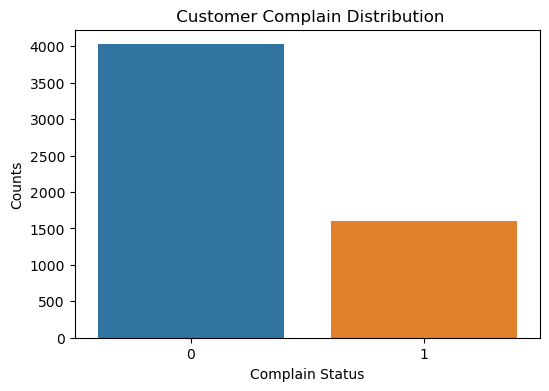

In [55]:
plt.figure(figsize=(6,4))
sns.countplot(x = 'Complain', data = df)
plt.title(" Customer Complain Distribution")
plt.xlabel('Complain Status')
plt.ylabel('Counts')
plt.show()

In [56]:
# Checking percentage of complains to No_complains

Complains =df.Complain.sum()/len(df.Complain)
No_complaints = 1-(df.Complain.sum()/len(df.Complain))

print('Complaints:',Complains)
print('No Complaints:',No_complaints)

Complaints: 0.2849023090586146
No Complaints: 0.7150976909413854


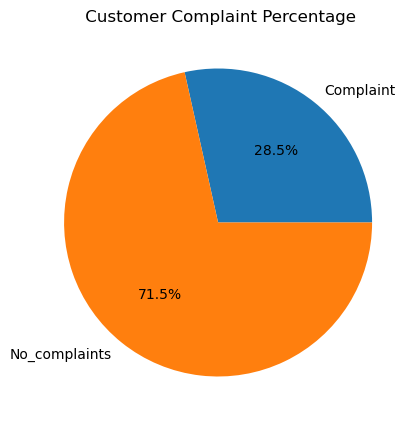

In [81]:
plt.figure(figsize=(6,5))
plt.pie([Complains, No_complaints],
       labels = ['Complaint', 'No_complaints'],
       autopct= '%1.1f%%')
plt.title(' Customer Complaint Percentage')
plt.savefig('Customer_comolaint_percentage_.png')
plt.show()

In [58]:
df['Complains_cat']= df.Complain.astype('category') # Coverts the binary column to categorical column

                                  
# Chi1 test                                                                      
cont_table8 = pd.crosstab(df['Complains_cat'], df['Churn'])
chi2,p,dof, epxpected = chi2_contingency(cont_table8)

print("Chi_Square Statistics:", chi2)
print('p_value:', p)

Chi_Square Statistics: 350.92545525927073
p_value: 2.6644609654641377e-78


In [59]:
# Correlation Test

corr_coef = df['Complain'].corr(df['Churn'])

print('Correlation Coefficient:', corr_coef)

Correlation Coefficient: 0.25018825469703126


 The P_value from the chi2 test is extremely small, suggesting a very strong relationship between Customers Complaint and Churn.The correlation test indicates a moderately postive linear relationship between the complaints and the churn. Signifying that, as the number of Complaints increases, the likelihood of churn also increases.
 
 Recommendation: Identify areas for improvement in handling customer complaints to reduce churn.

FROM OUR UNIVARIATE  ANALYSIS ( STATISCAL AND UNIVARIATE ANALYSIS) ABOVE, WE CONCLUDE THAT THE KEY DRIVERS OF CHURN ARE:

1 GENDER

2 ORDER_COUNT

3 SATISFACTION_SCORE

4 PREFERRED_MODE_OF_PAYMENT

5 WAREHOUSE_TO_HOME

6 CUSTOMER COMPLAIN


### Bi-variate Analysis using ANOVA and CORR HEATMAP

In [60]:
from scipy.stats import f_oneway


In [61]:
Num_col

Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'SatisfactionScore', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [86]:
# Lets perfrom the ANOVA test
anova_result= []

for features in Num_col:
    #Lets split the data into groups base on Churn
    group1 = df[df['Churn'] ==0][features]
    group2 = df[df['Churn']==1][features]
    
    #Perform ANOVA test
    f_stat, p_value = f_oneway(group1, group2)
    
    # Append the ANOVA result to the list
    
    anova_result.append({'Feature': features,
                        'F_statistics': f_stat,
                        'p_value': p_value})
    
    # Convert the list to a dataframe
    anova_result_df = pd.DataFrame(anova_result)
    print(anova_result_df)
    

  Feature  F_statistics  p_value
0   Churn           inf      0.0
  Feature  F_statistics        p_value
0   Churn           inf   0.000000e+00
1  Tenure    725.074333  2.494914e-150
    Feature  F_statistics        p_value
0     Churn           inf   0.000000e+00
1    Tenure    725.074333  2.494914e-150
2  CityTier     40.670599   1.945388e-10
           Feature  F_statistics        p_value
0            Churn           inf   0.000000e+00
1           Tenure    725.074333  2.494914e-150
2         CityTier     40.670599   1.945388e-10
3  WarehouseToHome     27.351135   1.757984e-07
           Feature  F_statistics        p_value
0            Churn           inf   0.000000e+00
1           Tenure    725.074333  2.494914e-150
2         CityTier     40.670599   1.945388e-10
3  WarehouseToHome     27.351135   1.757984e-07
4   HourSpendOnApp      1.993206   1.580613e-01
             Feature  F_statistics        p_value
0              Churn           inf   0.000000e+00
1             Tenure    7

From the ANOVA test above on the Numerical columns, the following features have statistically significant relationship with customer churn. 

-Tenure 

-CityTier

-WarehouseToHome

-Satisfaction Score

-Complain

-DaySinceLastOrder

-CashbackAmount

Consider the CashBackAmount, we need to find out if the customers with more cashbacks are likely to 
churn or if its the cusmtomers with less cashbacks.. Also for the Complain, we need to ascertain the direction of the churn by figuring out if the customers with more complains are likely to churn or the otherway round. We  shall do same for the selcted columns above.




In [87]:
# Lets determine the direction by checking the means

columns_to_analyze = ['CashbackAmount', 'DaySinceLastOrder','Complain', 'WarehouseToHome',
                     'CityTier','Tenure']

# Group the data by churn and calculate the mean for each column

results= df.groupby('Churn')[columns_to_analyze].mean()

# Reset the index to create a table-like structure

results =results.reset_index()

#Rename columns for better readability
results = results.rename( columns= {'Churn': 'Churn Status'})

print(results)

   Churn Status  CashbackAmount  DaySinceLastOrder  Complain  WarehouseToHome  \
0             0      180.635203           4.709739  0.234088        15.305639   
1             1      160.370928           3.222574  0.535865        16.856540   

   CityTier     Tenure  
0  1.619821  11.404528  
1  1.827004   3.859705  


SUMMARY OF ANOVA TEST RESULTS

1 Customers who did not churn have a mean cashback of $180. This suggest that customers who received higher cashbacks amounts were less likey to churn.

2 Customers who churned have significantly more complaints

3 Customers who churned lived an average of 16.85 Kilometers away from the warehouse, while those who 
didnt churn lived an average distance of 15.30 kilometers

4 Customers from higher-tier cities were more likely to churn, compared to those from lower tier cities.

5 Customers who churned had a significantly shorter tenure (mean of 3.8) months, compared to those who didnt
churn (mean of 11.4) months.

RECOMMENDATIONS:

1. Enhance customers support and complaints resolutions processes to reduce churn.

2. Continue to offer competitive cashback rewards for averaging ($180 for non-churn customers) to  incentivize customers and reduce churn.

3. Enhance logistics and delivery to reduce delivert times and improve customers satisfaction

4. Develop marketing strategies for customers in high_tier cities to address their needs and preference.

5. Focus on early customer experience by improving the onboarding processand early customers experience to reduce churn.

In [64]:
# Lets analyse each Categorical columns Customer Churn

In [65]:
for col in Cat_col:
    Contingency_table = pd.crosstab(df[col],[df['Churn']])
    
    #calculate Churn and Not_churned rates
    not_churn_rate = Contingency_table[0]/Contingency_table.sum(axis =1)
    churn_rate = Contingency_table[1]/Contingency_table.sum(axis=1)
    print(pd.concat([not_churn_rate,churn_rate], axis =1))

   

                             0         1
PreferredLoginDevice                    
Computer              0.801714  0.198286
Phone                 0.843844  0.156156
                             0         1
PreferredPaymentMode                    
Cash on Delivery      0.750973  0.249027
Credit Card           0.857948  0.142052
Debit Card            0.846154  0.153846
E wallet              0.771987  0.228013
UPI                   0.826087  0.173913
               0         1
Gender                    
Female  0.845058  0.154942
Male    0.822695  0.177305
                           0         1
PreferedOrderCat                      
Fashion             0.845036  0.154964
Grocery             0.951220  0.048780
Laptop & Accessory  0.897561  0.102439
Mobile              0.728059  0.271941
Mobile Phone        0.724626  0.275374
Others              0.924242  0.075758
                      0         1
MaritalStatus                    
Divorced       0.853774  0.146226
Married        0.884796  0.

PreferredPaymentMode: Customers using COD have the highest level of churn followed by using the E wallet.

Gender: The male gender are more likely to churn than the female.

PreferedOrderCat: Customers that prefers the Mobile and Mobile phone categories have the highest churn rate (27% each).

MaritalStatus: Customers who are single have the highest churn rate (26%).

#### Correlation Heatmap

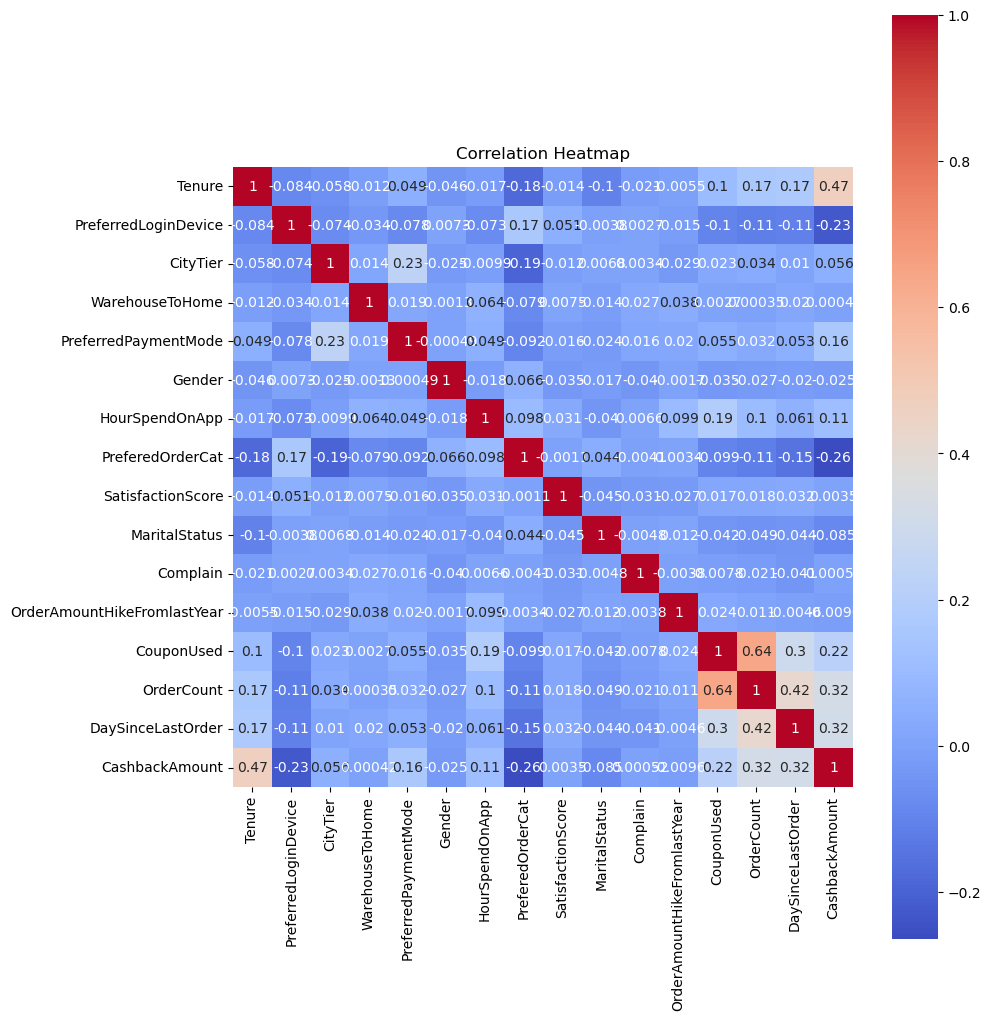

In [110]:
corr_matrix =X.corr()

plt.figure(figsize=(10,12))
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm', square = True)
plt.title('Correlation Heatmap')
plt.show()

### Predictive Modeling

In [90]:
df.head(5)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,Laptop & Accessory,2,Single,1,11.0,1.0,1.0,5.0,159.93
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,Mobile,3,Single,1,15.0,0.0,1.0,0.0,120.90
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,Mobile,3,Single,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,Laptop & Accessory,5,Single,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,3.0,Mobile,5,Single,0,11.0,1.0,1.0,3.0,129.60


In [95]:
df1=df.copy()

In [104]:
# Transforming categorical columns to numeric using label encoders
encoder1 = LabelEncoder()
encoder2 =LabelEncoder()

df1['Gender']= encoder.fit_transform(df1['Gender'])
df1['PreferedOrderCat'] = encoder1.fit_transform(df1['PreferedOrderCat'])
df1['MaritalStatus']= encoder2.fit_transform(df1['MaritalStatus'])
df1['PreferredLoginDevice']= encoder2.fit_transform(df1['PreferredLoginDevice'])
df1['PreferredPaymentMode']= encoder2.fit_transform(df1['PreferredPaymentMode'])

In [105]:
df1.head(5)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,1,3,6.0,4,0,3.0,2,2,2,1,11.0,1.0,1.0,5.0,159.93
1,1,9.0,2,1,8.0,6,1,3.0,3,3,2,1,15.0,0.0,1.0,0.0,120.90
2,1,9.0,2,1,30.0,4,1,2.0,3,3,2,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,2,3,15.0,4,1,2.0,2,5,2,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,2,1,12.0,0,1,3.0,3,5,2,0,11.0,1.0,1.0,3.0,129.60


In [98]:
df1.isna().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [106]:
# Lets scaled the variables using StandardScaler
scaler = MinMaxScaler()
df1_scaled = pd.DataFrame(scaler.fit_transform(df1), columns = df1.columns)

X = df1_scaled.drop('Churn', axis = 1)
y = df1_scaled['Churn']

In [109]:
X.columns
X.shape

(5630, 16)

In [108]:
y.shape

(5630,)

In [111]:
# Lets find the best model using GridSearchCV

def BestModel(X,y):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Define models and parameter grids
    models = [
        ('RandomForest', RandomForestClassifier(random_state=42), {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 10, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 3]
        }),
        ('GradientBoostingClassifier', GradientBoostingClassifier(random_state=24), {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.1, 0.2, 0.3],
            'max_depth': [2, 3, 5, 10]
        }),
        ('LightGBM', LGBMClassifier(random_state=42), {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.1, 0.2, 0.3],
            'max_depth': [2, 3, 5, 10]
        }),
        ('XGBoost', XGBClassifier(random_state=42), {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.1, 0.2, 0.3],
            'max_depth': [2, 3, 5, 10]
        }),
        ('Decision Tree', DecisionTreeClassifier(random_state=42), {
            'max_depth': [3, 5, 10, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 3]
        })
    ]
    
    # Initialize results dictionary
    results = {}
    
    # Loop over the models and perform GridSearchCV
    for model_name, model, param_grid in models:
        print(f'Training {model_name} model...')
        
        # Initialize GridSearch
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                                   cv=5, scoring='accuracy')
        
        # Perform GridSearch on training set
        grid_search.fit(X_train, y_train)
        
        # Get the best model and estimator
        best_model = grid_search.best_estimator_
        best_score = grid_search.best_score_
        
        # Evaluate the best model on the test set
        y_pred = best_model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_pred)
        
        # Store the result in the dictionary
        results[model_name] = {
            'best_model': best_model,
            'best_score': best_score,
            'test_accuracy': test_accuracy,
        }
    
    # Return the results
    return results

In [112]:
results = BestModel(X,y)
print(results)

Training RandomForest model...
Training GradientBoostingClassifier model...
Training LightGBM model...
[LightGBM] [Info] Number of positive: 538, number of negative: 2614
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 425
[LightGBM] [Info] Number of data points in the train set: 3152, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.170685 -> initscore=-1.580778
[LightGBM] [Info] Start training from score -1.580778
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

In [ ]:
# Summary of Model Performers
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"  Best Estimator: {metrics['best_model']}")
    print(f"  Best Cross-Validation Score: {metrics['best_score']:.4f}")
    print(f"  Test Accuracy: {metrics['test_accuracy']:.4f}")
    print("-" * 50)

In [113]:
#Extracting the overall best model
best_model_name = max(results, key=lambda x: results[x]['test_accuracy'])
best_model_details = results[best_model_name]

print(f"Best Model: {best_model_name}")
print(f"  Best Estimator: {best_model_details['best_model']}")
print(f"  Best Cross-Validation Score: {best_model_details['best_score']:.4f}")
print(f"  Test Accuracy: {best_model_details['test_accuracy']:.4f}")

Best Model: XGBoost
  Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
  Best Cross-Validation Score: 0.9531
  Test Accuracy: 0.9686


### Model Evaluation

In [114]:
# Model Evaluation
from sklearn.metrics import f1_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Extract the best model (LGBMClassifier based on highest test accuracy)
best_model = results['LightGBM']['best_model']

# Predict on the test set
y_pred1 = best_model.predict(X_test)

# Compute evaluation metrics
precision = precision_score(y_test, y_pred1, average='binary')
recall = recall_score(y_test, y_pred1, average='binary')
f1 = f1_score(y_test, y_pred1, average='binary')
accuracy = accuracy_score(y_test, y_pred1)

# Print results
print("Evaluation for the Best Model:")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-Score: {f1:.4f}")
print(f"Accuracy Score: {accuracy:.4f}")


Evaluation for the Best Model:
  Precision: 0.9297
  Recall: 0.8655
  F1-Score: 0.8964
Accuracy Score: 0.9674


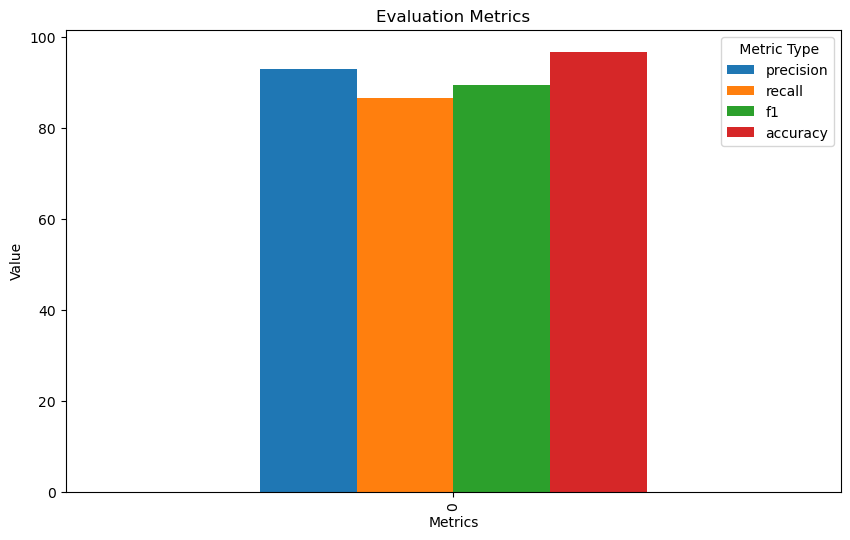

In [134]:
metric.reset_index(drop = True).plot(kind ='bar', figsize=(10,6))
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Evaluation Metrics')
plt.legend(title =' Metric Type')
plt.savefig('Evaluation Metrics')
plt.show()

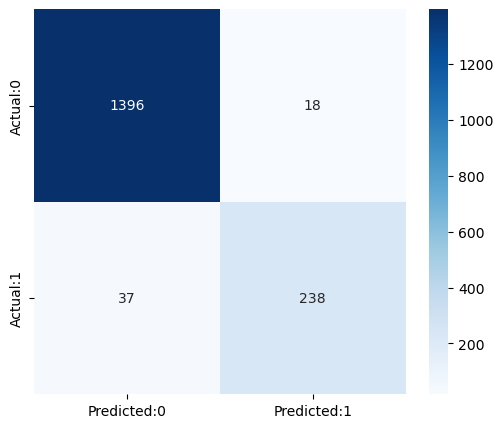

In [135]:
# Evaluating using Confusion Metrics for GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred1)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (6,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Blues")
plt.savefig('Confusion Metric.png')
plt.show()

As can be seen from the above, our model has a Precision score of  93.02%, Recall of 87.27%, F1-Score of  90.06%, and Accuracy Score of 96.86%.  From the foregoing evaluation metric, I can confidently say that is model is capable of helping to reduce customers churn rate, by identifying in advance potential churners. Thus, the model is ready for Deployment!!!!!!!!!


### Feature Importance Analysis

In [137]:
feature_importance= best_model.feature_importances_

#creat dataframe with feature names and their importance score

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort the Dataframe by importance in descending order

feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = False)

# print the top 10 most important features
print(feature_importance_df.head(10))

                        Feature  Importance
15               CashbackAmount         875
3               WarehouseToHome         624
11  OrderAmountHikeFromlastYear         438
0                        Tenure         428
14            DaySinceLastOrder         345
8             SatisfactionScore         334
4          PreferredPaymentMode         244
13                   OrderCount         166
7              PreferedOrderCat         158
2                      CityTier         148


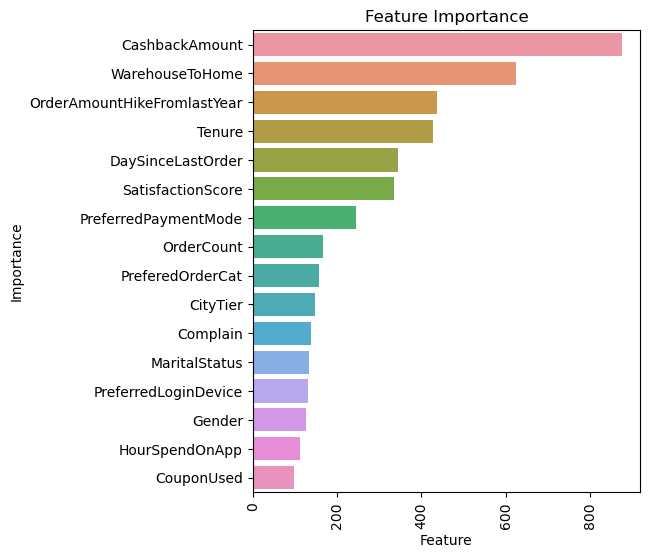

In [144]:
plt.figure(figsize=(5,6))
sns.barplot(x='Importance', y='Feature', data = feature_importance_df)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation = 90)
plt.savefig('Feature_importance.png')
plt.show()

From the above, the Feature Importance Analysis has just confirmed the Key Churn Drivers we identified earlier using the ANOVA test. In summary, this are the key churn drivers:

- Tenure 

- CityTier

- WarehouseToHome

- Satisfaction Score

- Complain

- DaySinceLastOrder

- CashbackAmount

- OrderHike

- Payment Mode

- Order Count